# Assignment 2 - Classification of Sentences from Medical Publications

**Submission deadline: Friday 23 April, 11pm** 

**Penalty for late submission: 2 marks per day late or part thereof**

**Assessment marks: 20 marks (20% of the total unit assessment)**

In this assignment you will implement several systems that classify sentences from the abstracts of medical publications.

The data is from a Kaggle in Class competition what we organised in 2012, as part of the Australasian Language Technology Association series of shared tasks: 

* [ALTA-NICTA Challenge](https://www.kaggle.com/c/alta-nicta-challenge2)

For more information about the original shared task, follow these links:

* [Description of the 2012 ALTA-NICTA Challenge](http://www.alta.asn.au/events/sharedtask2012/description.html).
* [Kaggle-in-class Competition Page](https://www.kaggle.com/c/alta-nicta-challenge2).


## Data
The data are stored in this CSV file:

* [train.csv](train.csv)

Below you can see the first lines of the file:

```
Prediction,Label,Document,Sentence,Text
0,background,10072623,1,OBJECTIVES
0,intervention,10072623,1,OBJECTIVES
0,population,10072623,1,OBJECTIVES
0,outcome,10072623,1,OBJECTIVES
1,other,10072623,1,OBJECTIVES
0,"study design",10072623,1,OBJECTIVES
1,background,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
1,intervention,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
1,population,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,outcome,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,other,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,"study design",10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
```

Each line represents the label of one sentence. The file is in CSV format (comma separated values), and the values correspond to the following:

1. `Prediction`: 1 if the text has the label, 0 if it doesn't.
2. `Label`: One of `background`, `intervention`, `population`, `outcome`, `study design`, `other` (see below).
3. `Document`: Document ID. A document may contain several sentences.
4. `Sentence`: Sentence ID. 1 for the first sentence, 2 for the second sentence, and so on.
5. `Text`: The contents of the sentence.

A sentence may have 1 or more of 6 possible labels, and consequently the same sentence appears in multiple lines, one per label. The possible labels are: 

* `background`: the sentence describes background information.
* `intervention`: the sentence describes a medical intervention.
* `population`: the sentence describes characteristics of the population being described in the publication. For example, the age of the subjects of study, their country of origin, etc.
* `outcome`: the sentence describes the outcome of the study, e.g. whether the intervention was effective.
* `study design`: the sentence contains details of the study design.
* `other`: anything else. For example, in the sample above, the text "OBJECTIVES" was a section heading. 

The first number of each line indicates whether the label is assigned to the sentence (1) or not (0).

For example, the first sentence of document with ID 10072623 has the label "other", but the second sentence has the labels "background", "intervention", and "population".

**Your task will be to write code that predicts the label or labels of the input sentences.** This is what is called "multi-label classification".

**If you haven't completed the exercises of week 6 practical, complete them before attempting this assignment. They are designed to help with the assignment.**

The following code uses the `pandas` library (https://pandas.pydata.org/) to read the data, and `matplotlib` (https://matplotlib.org/) to plot the distribution of labels.

In [44]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt


In [45]:
train_pd = pd.read_csv('https://raw.githubusercontent.com/COMP3220/2021S1/main/assignments/a2/train.csv')


To plot the data we will convert the data from a "long" format to a "wide" format that can be processed more easily. In this wide format, there is one column for each label. The code to do this uses panda's `pivot_table`:

In [46]:
train_pd = train_pd.pivot_table(index=['Document','Sentence','Text'], columns=['Label'], values='Prediction').reset_index() 
train_pd.head()

Label,Document,Sentence,Text,background,intervention,other,outcome,population,study design
0,145506,1,The rare liquor leakage syndrome with cranial ...,1,0,0,0,0,0
1,145506,2,This does not occur after a suboccipital punct...,1,0,0,0,0,0
2,145506,3,A report is given on three cases with differen...,0,0,0,0,1,0
3,145506,4,The prognosis of the eye-muscle paresis is good.,0,0,0,1,0,0
4,145506,5,Restitutio ad integrum resulted.,0,0,0,1,0,0


Let's plot the distribution of labels:

In [47]:
labels = ['background', 'intervention', 'population', 'outcome', 'study design', 'other']
label_counts = []
for l in labels:
    counts = train_pd[l].sum()
    label_counts.append(counts)
print(label_counts)

[2031, 565, 662, 3564, 193, 2712]


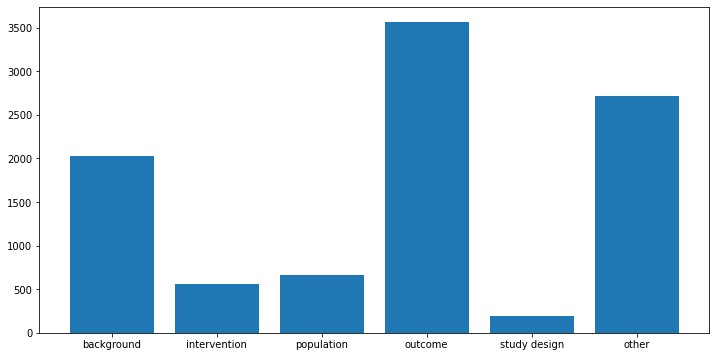

In [48]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.show()

We can see that the training data contain 800 documents:

In [49]:
documents = list(set(train_pd['Document']))
print(len(documents))


800


# Task 1 (5 marks): Data partition
Based on the list of documents (for example, use the variable `documents` above), partition the data into three sets: a training set, a devtest set, and a test set, so that:

* The training set uses 600 documents.
* The dev-test set uses 100 documents.
* The test set uses 100 documents.

Make sure that the partition is a **random partition**. That is, you need to shuffle the list of documents before you make the partitions. Also, to facilitate reproducibility, execute the following cell that sets a specific random seed:



In [50]:
import random
random.seed(1234)


After writing the code, answer the following questions using additional text cells in this Jupyter notebook:

1. (1 mark) Why do we want to use document IDs, and not individual sentences, to make the partition?
2. (1 mark) Plot the distribution of labels in each partition and comment on whether these distributions are similar.

The remaining 3 marks are for the code that performs the partition.

Hint: If you want to iterate through each row of the pandas data frame `train_pd`, you can use `itertuples`. Read, for example:

* https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/
* https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

Here is some code that shows the output of `itertuples`  over the first three rows:

```
train_pd_tuples = [r for r in train_pd.itertuples(index=False, name=None)]
train_pd_tuples[:3]
```

In [51]:
random.shuffle(documents)

train_documents = documents[:600]
devtest_documents = documents[600:700]
test_documents = documents[700:]

train_pd_tuples = [r for r in train_pd.itertuples(index=False, name=None)]

train_set = []
devtest_set = []
test_set = []

for i in range(0,len(train_pd_tuples)):
    if(train_pd_tuples[i][0] in train_documents):
        train_set.append(train_pd_tuples[i])
    elif(train_pd_tuples[i][0] in devtest_documents):
        devtest_set.append(train_pd_tuples[i])  
    else:
        test_set.append(train_pd_tuples[i])
        
        

1. The distribution of different labels between documents seems to be very similar. We partition the data on Document ID's in order to maintain this ratio between training, development testing and testing data. This prevents skewing of certain classes and risk of underfitting less represented labels and overfitting on more represented ones. If we partitioned on sentences this may have happened. Hence, the method we have used achieves the most accurate training and testing phases with the data that has been given. 

In [52]:
train_label_counts = []
for l in range(3,9):
    count = 0
    for i in range(0, len(train_set)):
        if(train_set[i][l] == 1):
            count = count + 1
    train_label_counts.append(count)
print(train_label_counts)

[1537, 419, 2044, 2644, 501, 147]


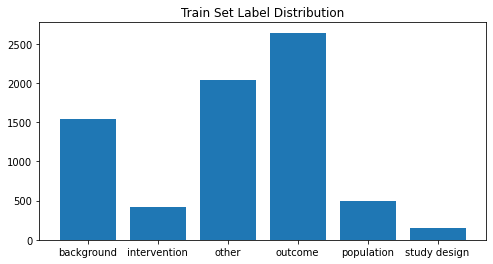

In [53]:
new_labels = ['background', 'intervention', 'other', 'outcome', 'population', 'study design']

plt.figure(figsize=(8,4))
plt.bar(range(6), train_label_counts)
plt.xticks(range(6), new_labels)
plt.title('Train Set Label Distribution')
plt.show()

In [54]:
devtest_label_counts = []
for l in range(3,9):
    count = 0
    for i in range(0, len(devtest_set)):
        if(devtest_set[i][l] == 1):
            count = count + 1
    devtest_label_counts.append(count)
print(devtest_label_counts)

[253, 83, 347, 475, 78, 21]


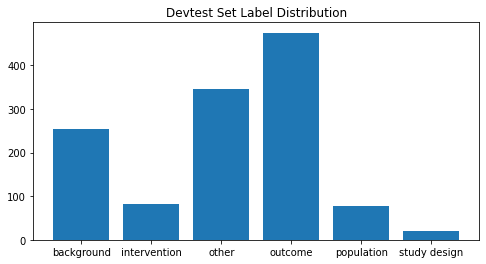

In [55]:
plt.figure(figsize=(8,4))
plt.bar(range(6), devtest_label_counts)
plt.xticks(range(6), new_labels)
plt.title('Devtest Set Label Distribution')
plt.show()

In [56]:
test_label_counts = []
for l in range(3,9):
    count = 0
    for i in range(0, len(test_set)):
        if(test_set[i][l] == 1):
            count = count + 1
    test_label_counts.append(count)
print(test_label_counts)

[241, 63, 321, 445, 83, 25]


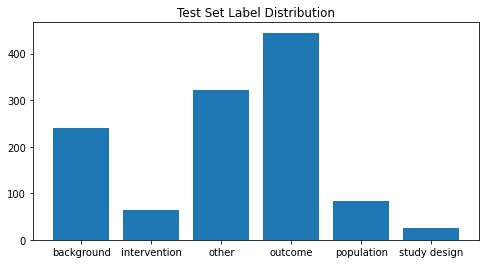

In [57]:
plt.figure(figsize=(8,4))
plt.bar(range(6), test_label_counts)
plt.xticks(range(6), new_labels)
plt.title('Test Set Label Distribution')
plt.show()

2. The distributions of labels in each of the train, devtest and test set are very similar upon inspection of their plots above. 

# Task 2 (5 marks): Naive Bayes

Using scikit-learn, train 6 separate Naive Bayes classifiers (hint: use `MultinomialNB` for each of the classifiers). Each classifier must be trained with the part of the training data that corresponds with one of the possible labels. For example:

1. Train a Naive Bayes classifier using only the data that corresponds with the "background" label.
2. Train a **different** Naive Bayes classifier using only the data that corresponds with the "intervention" label.
3. And so on with the other labels, for a total of 6 different classifiers.

Make sure that you train only with the training data. For each classifier, report the accuracy on the training data, devtest data, and test data.

Use tf.idf of the top 10000 words as the feature extractor (hint: use scikit-learn's `TfidfVectorizer`, and use the option `max_features=10000`). You do not need to use stop words or stemming for this task.

Report the evaluation of your classifers and answer the following questions.

1. (1 mark) What evaluation metric did you choose and why?
2. (1 mark) Comment on whether any of the 6 classifiers is overfitting and explain how you determined whether they are overfitting.

The remaining 3 marks will be allocated to the code that implements and evaluates the Naive Bayes classifiers.

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(max_features=10000)
tfidf.fit(train_pd_tuples[i][2] for i in range(0, len(train_pd_tuples)))

train_matrix = tfidf.transform(train_set[i][2] for i in range(0, len(train_set))).toarray()
devtest_matrix = tfidf.transform(devtest_set[i][2] for i in range(0, len(devtest_set))).toarray()
test_matrix = tfidf.transform(test_set[i][2] for i in range(0, len(test_set))).toarray()

sk_train_matrix = train_matrix.tolist()
sk_devtest_matrix = devtest_matrix.tolist()
sk_test_matrix = test_matrix.tolist()

train_X_b = []
for i in range(0, len(train_set)):
    train_X_b.append(sk_train_matrix[i])
    
train_y_b = []
for i in range(0, len(train_set)):
    train_y_b.append(train_set[i][3])
    
classifier_b = MultinomialNB()
classifier_b.fit(train_X_b, train_y_b)

train_predictions_b = classifier_b.predict(train_X_b)
train_acc_b = accuracy_score(train_y_b, train_predictions_b)

In [59]:
devtest_X_b = []
for i in range(0, len(devtest_set)):
    devtest_X_b.append(sk_devtest_matrix[i])
    
devtest_y_b = []
for i in range(0, len(devtest_set)):
    devtest_y_b.append(devtest_set[i][3])    

devtest_predictions_b = classifier_b.predict(devtest_X_b)
devtest_acc_b = accuracy_score(devtest_y_b, devtest_predictions_b)

In [60]:
test_X_b = []
for i in range(0, len(test_set)):
    test_X_b.append(sk_test_matrix[i])
    
test_y_b = []
for i in range(0, len(test_set)):
    test_y_b.append(test_set[i][3])    

test_predictions_b = classifier_b.predict(test_X_b)
test_acc_b = accuracy_score(test_y_b, test_predictions_b)

In [61]:
train_X_i = []
for i in range(0, len(train_set)):
    train_X_i.append(sk_train_matrix[i])
    
train_y_i = []
for i in range(0, len(train_set)):
    train_y_i.append(train_set[i][4])
    
classifier_i = MultinomialNB()
classifier_i.fit(train_X_i, train_y_i)

train_predictions_i = classifier_i.predict(train_X_i)
train_acc_i = accuracy_score(train_y_i, train_predictions_i)

In [62]:
devtest_X_i = []
for i in range(0, len(devtest_set)):
    devtest_X_i.append(sk_devtest_matrix[i])
    
devtest_y_i = []
for i in range(0, len(devtest_set)):
    devtest_y_i.append(devtest_set[i][4])    

devtest_predictions_i = classifier_i.predict(devtest_X_i)
devtest_acc_i = accuracy_score(devtest_y_i, devtest_predictions_i)

In [63]:
test_X_i = []
for i in range(0, len(test_set)):
    test_X_i.append(sk_test_matrix[i])
    
test_y_i = []
for i in range(0, len(test_set)):
    test_y_i.append(test_set[i][4])    

test_predictions_i = classifier_b.predict(test_X_i)
test_acc_i = accuracy_score(test_y_i, test_predictions_i)

In [64]:
train_X_ot = []
for i in range(0, len(train_set)):
    train_X_ot.append(sk_train_matrix[i])
    
train_y_ot = []
for i in range(0, len(train_set)):
    train_y_ot.append(train_set[i][5])
    
classifier_ot = MultinomialNB()
classifier_ot.fit(train_X_ot, train_y_ot)

train_predictions_ot = classifier_ot.predict(train_X_ot)
train_acc_ot = accuracy_score(train_y_ot, train_predictions_ot)

In [65]:
devtest_X_ot = []
for i in range(0, len(devtest_set)):
    devtest_X_ot.append(sk_devtest_matrix[i])
    
devtest_y_ot = []
for i in range(0, len(devtest_set)):
    devtest_y_ot.append(devtest_set[i][5])    

devtest_predictions_ot = classifier_ot.predict(devtest_X_ot)
devtest_acc_ot = accuracy_score(devtest_y_ot, devtest_predictions_ot)

In [66]:
test_X_ot = []
for i in range(0, len(test_set)):
    test_X_ot.append(sk_test_matrix[i])
    
test_y_ot = []
for i in range(0, len(test_set)):
    test_y_ot.append(test_set[i][5])    

test_predictions_ot = classifier_ot.predict(test_X_ot)
test_acc_ot = accuracy_score(test_y_ot, test_predictions_ot)

In [67]:
train_X_ou = []
for i in range(0, len(train_set)):
    train_X_ou.append(sk_train_matrix[i])
    
train_y_ou = []
for i in range(0, len(train_set)):
    train_y_ou.append(train_set[i][6])
    
classifier_ou = MultinomialNB()
classifier_ou.fit(train_X_ou, train_y_ou)

train_predictions_ou = classifier_ou.predict(train_X_ou)
train_acc_ou = accuracy_score(train_y_ou, train_predictions_ou)

In [68]:
devtest_X_ou = []
for i in range(0, len(devtest_set)):
    devtest_X_ou.append(sk_devtest_matrix[i])
    
devtest_y_ou = []
for i in range(0, len(devtest_set)):
    devtest_y_ou.append(devtest_set[i][6])    

devtest_predictions_ou = classifier_ou.predict(devtest_X_ou)
devtest_acc_ou = accuracy_score(devtest_y_ou, devtest_predictions_ou)

In [69]:
test_X_ou = []
for i in range(0, len(test_set)):
    test_X_ou.append(sk_test_matrix[i])
    
test_y_ou = []
for i in range(0, len(test_set)):
    test_y_ou.append(test_set[i][6])    

test_predictions_ou = classifier_ou.predict(test_X_ou)
test_acc_ou = accuracy_score(test_y_ou, test_predictions_ou)

In [70]:
train_X_p = []
for i in range(0, len(train_set)):
    train_X_p.append(sk_train_matrix[i])
    
train_y_p = []
for i in range(0, len(train_set)):
    train_y_p.append(train_set[i][7])
    
classifier_p = MultinomialNB()
classifier_p.fit(train_X_p, train_y_p)

train_predictions_p = classifier_p.predict(train_X_p)
train_acc_p = accuracy_score(train_y_p, train_predictions_p)

In [71]:
devtest_X_p = []
for i in range(0, len(devtest_set)):
    devtest_X_p.append(sk_devtest_matrix[i])
    
devtest_y_p = []
for i in range(0, len(devtest_set)):
    devtest_y_p.append(devtest_set[i][7])    

devtest_predictions_p = classifier_p.predict(devtest_X_p)
devtest_acc_p = accuracy_score(devtest_y_p, devtest_predictions_p)

In [72]:
test_X_p = []
for i in range(0, len(test_set)):
    test_X_p.append(sk_test_matrix[i])
    
test_y_p = []
for i in range(0, len(test_set)):
    test_y_p.append(test_set[i][7])    

test_predictions_p = classifier_p.predict(test_X_p)
test_acc_p = accuracy_score(test_y_p, test_predictions_p)

In [73]:
train_X_s = []
for i in range(0, len(train_set)):
    train_X_s.append(sk_train_matrix[i])
    
train_y_s = []
for i in range(0, len(train_set)):
    train_y_s.append(train_set[i][8])
    
classifier_s = MultinomialNB()
classifier_s.fit(train_X_s, train_y_s)

train_predictions_s = classifier_s.predict(train_X_s)
train_acc_s = accuracy_score(train_y_s, train_predictions_s)

In [74]:
devtest_X_s = []
for i in range(0, len(devtest_set)):
    devtest_X_s.append(sk_devtest_matrix[i])
    
devtest_y_s = []
for i in range(0, len(devtest_set)):
    devtest_y_s.append(devtest_set[i][8])    

devtest_predictions_s = classifier_s.predict(devtest_X_s)
devtest_acc_s = accuracy_score(devtest_y_s, devtest_predictions_s)

In [75]:
test_X_s = []
for i in range(0, len(test_set)):
    test_X_s.append(sk_test_matrix[i])
    
test_y_s = []
for i in range(0, len(test_set)):
    test_y_s.append(test_set[i][8])    

test_predictions_s = classifier_s.predict(test_X_s)
test_acc_s = accuracy_score(test_y_s, test_predictions_s)

### Naive Bayes Analysis

In [76]:
print("'Background' Classifier Accuracy")
print("Training Set: " + str(train_acc_b))
print("Devtest Set: " + str(devtest_acc_b))
print("Testing Set: " + str(test_acc_b))
print("")

print("'Intervention' Classifier Accuracy")
print("Training Set: " + str(train_acc_i))
print("Devtest Set: " + str(devtest_acc_i))
print("Testing Set: " + str(test_acc_i))
print("")

print("'Other' Classifier Accuracy")
print("Training Set: " + str(train_acc_ot))
print("Devtest Set: " + str(devtest_acc_ot))
print("Testing Set: " + str(test_acc_ot))
print("")

print("'Outcome' Classifier Accuracy")
print("Training Set: " + str(train_acc_ou))
print("Devtest Set: " + str(devtest_acc_ou))
print("Testing Set: " + str(test_acc_ou))
print("")

print("'Population' Classifier Accuracy")
print("Training Set: " + str(train_acc_p))
print("Devtest Set: " + str(devtest_acc_p))
print("Testing Set: " + str(test_acc_p))
print("")

print("'Study Design' Classifier Accuracy")
print("Training Set: " + str(train_acc_s))
print("Devtest Set: " + str(devtest_acc_s))
print("Testing Set: " + str(test_acc_s))

'Background' Classifier Accuracy
Training Set: 0.8231733679204496
Devtest Set: 0.8040540540540541
Testing Set: 0.7867975022301517

'Intervention' Classifier Accuracy
Training Set: 0.9397607724455973
Devtest Set: 0.9298986486486487
Testing Set: 0.9259589652096343

'Other' Classifier Accuracy
Training Set: 0.8834125954748523
Devtest Set: 0.8682432432432432
Testing Set: 0.8581623550401427

'Outcome' Classifier Accuracy
Training Set: 0.8798097708603545
Devtest Set: 0.7643581081081081
Testing Set: 0.775200713648528

'Population' Classifier Accuracy
Training Set: 0.9279435077100446
Devtest Set: 0.9341216216216216
Testing Set: 0.9259589652096343

'Study Design' Classifier Accuracy
Training Set: 0.9788153912667531
Devtest Set: 0.9822635135135135
Testing Set: 0.9776984834968778


In [77]:
NB_acc = test_acc_b * test_label_counts[0]/len(test_set) + test_acc_i * test_label_counts[1]/len(test_set) + test_acc_ot * test_label_counts[2]/len(test_set) + test_acc_ou * test_label_counts[3]/len(test_set)+test_acc_p * test_label_counts[4]/len(test_set) + test_acc_s * test_label_counts[5]/len(test_set)
print("Naive Bayes Weighted Accuracy: " + str(NB_acc))

Naive Bayes Weighted Accuracy: 0.8650179327270079


1. The evaluation metric I chose to use is accuracy. This is because the classes are not significantly skewed enough to justify using other metrics. Hence, accuracy would provide an accurate representation of the effectiveness of the model.

2. One of the classifiers is overfitting - the 'outcome'classifier. This was determined since the accuracy of the training predictions was significantly higher than that of the development testing and testing sets. This means it is overfitting because it fits well to the seen data (training), but then performs poorly with unseen data, hence over-optimizing to the training set.

# Task 3 (5 marks): A Simple Neural Network
Implement a simple TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept tf.idf information.
2. An output layer that has 6 cells. Each cell will classify the sentence into one of the 6 possible sentence types.

As in the previous task, train the classifier with the tf.idf information of the input sentences. (Hint: sklearn produces sparse tf.idf matrices but TensorFlow models only accept dense matrices so you need to convert the tf_idf matrix of the training data into a dense Numpy array. As we have seen in the lectures, you can use `toarray` to convert the sparse matrix into a dense Numpy array.)

Train and test your system and report on the results. Include text cells in this Jupyter notebook where you must answer the following questions (2 marks):

1. How many parameters does the model have?
2. What is the optimal number of epochs? How do you know this is the optimal number of epochs?
3. Does your system overfit when training with the optimal number of epochs? How can you determine this?
4. How do the results compare against the Naive Bayes implementation of the previous task?

The remaining 3 marks will be allocated to the code.

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [79]:
mlp_train_X = np.zeros((len(train_set), 10000))
for i in range(0, len(train_set)):
  for j in range(0, 10000):
    mlp_train_X[i, j] = sk_train_matrix[i][j]

mlp_train_y = np.zeros((len(train_set), 6))
for i in range(0, len(train_set)):
  for j in range(3,9):
    mlp_train_y[i, j-3] = train_set[i][j]

mlp_val_X = np.zeros((len(devtest_set), 10000))
for i in range(0, len(devtest_set)):
  for j in range(0, 10000):
    mlp_val_X[i, j] = sk_devtest_matrix[i][j]

mlp_val_y = np.zeros((len(devtest_set), 6))
for i in range(0, len(devtest_set)):
  for j in range(3,9):
    mlp_val_y[i, j-3] = devtest_set[i][j] 
    
mlp_test_X = np.zeros((len(test_set), 10000))
for i in range(0, len(test_set)):
  for j in range(0, 10000):
    mlp_test_X[i, j] = sk_test_matrix[i][j]

mlp_test_y = np.zeros((len(test_set), 6))
for i in range(0, len(test_set)):
  for j in range(3,9):
    mlp_test_y[i, j-3] = test_set[i][j]    

In [80]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [81]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 321,286
Trainable params: 321,286
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
____________________________

In [83]:
history = model.fit(mlp_train_X,
                    mlp_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(mlp_val_X, mlp_val_y))

Epoch 1/20
14/14 [==============================] - 2s 73ms/step - loss: 1.8288 - accuracy: 0.4427 - val_loss: 1.7222 - val_accuracy: 0.5321
Epoch 2/20
14/14 [==============================] - 0s 31ms/step - loss: 1.6504 - accuracy: 0.5274 - val_loss: 1.5532 - val_accuracy: 0.5473
Epoch 3/20
14/14 [==============================] - 0s 33ms/step - loss: 1.4754 - accuracy: 0.5367 - val_loss: 1.4240 - val_accuracy: 0.5769
Epoch 4/20
14/14 [==============================] - 0s 32ms/step - loss: 1.3300 - accuracy: 0.5939 - val_loss: 1.3271 - val_accuracy: 0.6123
Epoch 5/20
14/14 [==============================] - 0s 33ms/step - loss: 1.2060 - accuracy: 0.6786 - val_loss: 1.2434 - val_accuracy: 0.6562
Epoch 6/20
14/14 [==============================] - 0s 31ms/step - loss: 1.0852 - accuracy: 0.7278 - val_loss: 1.1698 - val_accuracy: 0.6698
Epoch 7/20
14/14 [==============================] - 0s 33ms/step - loss: 0.9588 - accuracy: 0.7705 - val_loss: 1.1068 - val_accuracy: 0.6858
Epoch 8/20
14

In [84]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

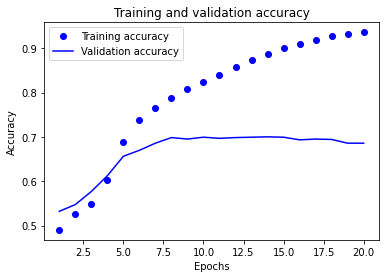

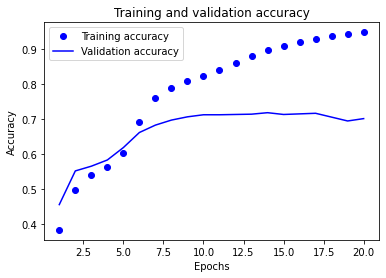

In [85]:
plot_history(history)

In [92]:
def plot_loss_history(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

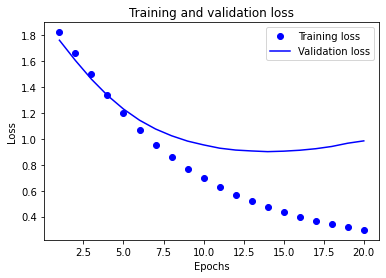

In [93]:
plot_loss_history(history)

In [96]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(mlp_train_X, mlp_train_y, epochs=8, batch_size=512)
test_loss, test_accuracy = model.evaluate(mlp_test_X, mlp_test_y)


Epoch 1/8
14/14 [==============================] - 1s 27ms/step - loss: 1.8336 - accuracy: 0.3822
Epoch 2/8
14/14 [==============================] - 0s 27ms/step - loss: 1.6411 - accuracy: 0.5191
Epoch 3/8
14/14 [==============================] - 0s 27ms/step - loss: 1.4829 - accuracy: 0.5495
Epoch 4/8
14/14 [==============================] - 0s 28ms/step - loss: 1.3288 - accuracy: 0.5995
Epoch 5/8
14/14 [==============================] - 0s 27ms/step - loss: 1.2094 - accuracy: 0.6755
Epoch 6/8
14/14 [==============================] - 0s 27ms/step - loss: 1.0932 - accuracy: 0.7324
Epoch 7/8
14/14 [==============================] - 0s 26ms/step - loss: 0.9706 - accuracy: 0.7780
Epoch 8/8
36/36 [==============================] - 0s 2ms/step - loss: 1.0476 - accuracy: 0.6699


In [97]:
print('test_accuracy:', test_accuracy)

test_accuracy: 0.6699375510215759


After trying a number of different models I eventually found roughly optimal settings for our simple neural network.

1. The number of parameters in our optimal model is 321,286, as shown above.

2. The optimal number of epochs is roughly 8. As shown by the training and validation accuracy graph, the validation accuracy stops increasing significantly at around 8 epochs and starts to plateau. Meanwhile, training accuracy continues to increase resembling it starting to overfit. This is reinforced by the loss graph which shows the validations loss ceasing to decrease as significantly at around 8 epochs. 

3. The system does not overfit when we use the optimal number of epochs to train. We can determine this by comparing the training accuracy at the end of the training stage and the accuracy of the model on the unseen testing set, both of which are very similar ~0.6815. Hence the model is not overly optimized to the seen data. 

4. The results of the simple neural network implementation of the model are significantly worse than that of the Naive Bayes model. The accuracy of this model was approximately 0.6815 compared to the weighted Naive Bayes test set accuracy of ~0.8650. This weighted statictic is seen to be accurate as the ratios of different labels are representative of other random samples of the given medical puplications data since we partitioned on the documents. 

# Task 4 (5 marks): A Recurrent Neural Network
Implement a more complex neural network what is composed of the following sequence of layers:

* An embedding layer that generates **embedding vectors with 40 dimensions**. Tensorflow requires that this input list be of fixed length. You need to choose the appropriate length by examining the distribution of lengths of the input sentences. (Hint: to set the fixed input length, use TensorFlow's `pad_sequences`). Also, restrict the vocabulary to the **10000 most frequent words** of the training set (Hint: use [Keras' tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) with the option `num_words=10000`)
* A LSTM layer that generates an **output of 50 dimensions**.
* The final output layer composed of the **6 binary classifiers**.

Train the system on the training data and evaluate the results. Compare with the previous systems and conduct the same kind of analysis that you did in the previous tasks.

The marks for this task will be allocated as follows:

* 3 marks for the code.
* 2 marks for the explanations and analysis.

In [98]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [99]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts([train_set[i][2] for i in range(0, len(train_set))])

In [100]:
indices_train = tokenizer.texts_to_sequences([train_set[i][2] for i in range(0, len(train_set))])
indices_devtest = tokenizer.texts_to_sequences([devtest_set[i][2] for i in range(0, len(devtest_set))])
indices_test = tokenizer.texts_to_sequences([test_set[i][2] for i in range(0, len(test_set))])

(array([1.390e+03, 1.427e+03, 1.867e+03, 1.266e+03, 6.890e+02, 2.440e+02,
        4.600e+01, 7.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <a list of 10 Patch objects>)

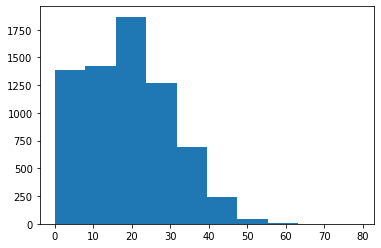

In [102]:
plt.hist([len(t) for t in indices_train])

In [103]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 20
rnn_x_train = pad_sequences(indices_train, maxlen=maxlen, truncating='pre')
rnn_x_devtest = pad_sequences(indices_devtest, maxlen=maxlen, truncating='pre')
rnn_x_test = pad_sequences(indices_test, maxlen=maxlen, truncating='pre')

'Pre-truncating was selected over 'post' as it yielded greater unseen data set results after development testing

In [112]:
rnn_train_y = mlp_train_y
rnn_devtest_y = mlp_val_y
rnn_test_y = mlp_test_y

In [105]:
embedding_dim=40
lstm_dim=50
rnn_model = models.Sequential()
rnn_model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
rnn_model.add(layers.LSTM(lstm_dim))
rnn_model.add(layers.Dense(6, activation='sigmoid'))
rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            400000    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                18200     
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 306       
Total params: 418,506
Trainable params: 418,506
Non-trainable params: 0
_________________________________________________________________


In [107]:
rnn_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

rnn_history = rnn_model.fit(rnn_x_train, 
                    rnn_train_y,
                    epochs=25,
                    batch_size=100,
                    validation_data=(rnn_x_devtest, rnn_devtest_y))

Epoch 1/25
70/70 [==============================] - 5s 41ms/step - loss: 0.4775 - accuracy: 0.3869 - val_loss: 0.3418 - val_accuracy: 0.5431
Epoch 2/25
70/70 [==============================] - 1s 19ms/step - loss: 0.3257 - accuracy: 0.5475 - val_loss: 0.3207 - val_accuracy: 0.5532
Epoch 3/25
70/70 [==============================] - 1s 21ms/step - loss: 0.2884 - accuracy: 0.5873 - val_loss: 0.2936 - val_accuracy: 0.6166
Epoch 4/25
70/70 [==============================] - 1s 20ms/step - loss: 0.2516 - accuracy: 0.6823 - val_loss: 0.2771 - val_accuracy: 0.6385
Epoch 5/25
70/70 [==============================] - 1s 20ms/step - loss: 0.2254 - accuracy: 0.7234 - val_loss: 0.2709 - val_accuracy: 0.6512
Epoch 6/25
70/70 [==============================] - 1s 20ms/step - loss: 0.1961 - accuracy: 0.7788 - val_loss: 0.2722 - val_accuracy: 0.6723
Epoch 7/25
70/70 [==============================] - 1s 19ms/step - loss: 0.1707 - accuracy: 0.8016 - val_loss: 0.2894 - val_accuracy: 0.6537
Epoch 8/25
70

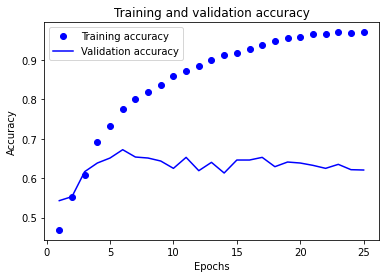

In [108]:
plot_history(rnn_history)

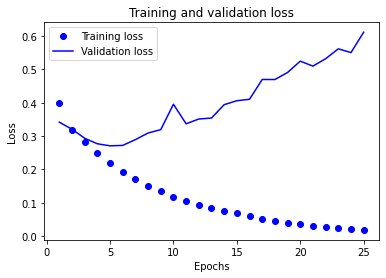

In [109]:
plot_loss_history(rnn_history)

In [110]:
rnn_model = models.Sequential()
rnn_model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
rnn_model.add(layers.LSTM(lstm_dim))
rnn_model.add(layers.Dense(6, activation='sigmoid'))

rnn_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

rnn_history = rnn_model.fit(rnn_x_train, 
                    rnn_train_y,
                    epochs=5,
                    batch_size=100)

Epoch 1/5
70/70 [==============================] - 3s 18ms/step - loss: 0.4840 - accuracy: 0.4290
Epoch 2/5
70/70 [==============================] - 1s 17ms/step - loss: 0.3288 - accuracy: 0.5410
Epoch 3/5
70/70 [==============================] - 1s 17ms/step - loss: 0.2840 - accuracy: 0.6040
Epoch 4/5
70/70 [==============================] - 1s 17ms/step - loss: 0.2510 - accuracy: 0.6840
Epoch 5/5
70/70 [==============================] - 1s 18ms/step - loss: 0.2089 - accuracy: 0.7521


In [113]:
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(rnn_x_test, rnn_test_y)
print("RNN Model Accuracy: "+ str(rnn_test_accuracy))

36/36 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.6111
RNN Model Accuracy: 0.6110615730285645


A similar analysis to our simple neural network of our new, more complex RNN model shows that:

1. Our new model has 418,506 parameters, which is significantly more than out MLP model.

2. The optimal number of epochs for this model was around 5 epochs. At this point, not only did the validation data accuracy reach a clear peak, but the loss also showed a very distinct minimum. 

3. After we had trained this RNN model with the optimal number of epochs, it did still show signs of overfitting to the training data. This is because the training set accuracy (0.7496) was still significantly larger than the accuracy of the model on the unseen test set data (0.6628). This relflects an over-optimization to the subtleties of the training set.

4. Compared to the other models, the overall performance of the RNN model was significantly worse than the simple MLP model and the Naive Bayes classifier models. It yielded a test set accuracy of 0.6628 compared to the 0.6815 and 0.8650 returned by the simplae neural network and Naive Bayes models respectively. Hence, provided the data was used in an optimal way, shows that the Naive Bayes classifier model was the most effective in the task of classifying medical puplication sentences. 

# Submission of results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this [useful guide to the MarkDown notation](http://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-integrity).
